In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tracker
import stats
import visualizer
import utils

import importlib

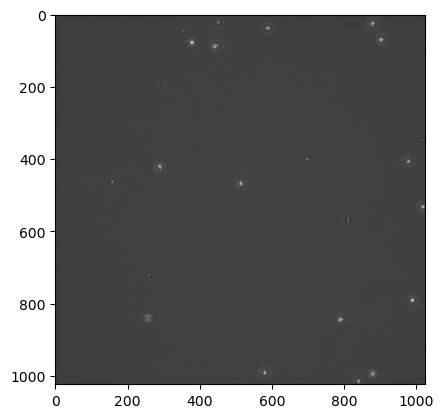

In [2]:
videofile = "ExampleVideos/20X Ph 149Fps Wash 1 16 P018cu R3.mp4"
#videofile = "ExampleVideos/10X_LD_1024_R1.avi"
#videofile = "ExampleVideos/10X_-ph_9fps_R1.avi"

# Visualize the input
cap = cv2.VideoCapture(videofile)

# Get the first frame
ret, frame = cap.read()

plt.imshow(frame)

### Feed through the tracking pipeline

In [3]:
importlib.reload(tracker)
importlib.reload(utils)

frames = utils.loadVideo(videofile,as_gray=True)
#tails = frames<np.median(frames,axis=0)
#frames[np.where(tails)] = 255
#frames = np.abs(frames.astype(np.float64) - np.median(frames,axis=0))
#frames = 255*frames/np.max(frames)
#frames = frames.astype(np.uint8)

plt.imshow(frames[0],cmap='gray')
plt.show()
f = tracker.determineCentroids(frames)
t = tracker.trackCentroids(f)

#print(t.head())

Frame 149: 20 trajectories present.


In [4]:
importlib.reload(tracker)

compute_segments = True
if compute_segments:
    final = tracker.segmentCells(frames, t)
else:
    final = t

print(final.head())

100%|██████████| 150/150 [01:49<00:00,  1.37it/s]


             y           x         mass      size       ecc     signal  \
0    22.816463  451.590549  1138.538807  1.927892  0.092559  78.100985   
1  1016.420399  839.749667  1565.490860  2.644284  0.083446  62.827904   
2   995.581361  878.531883  1627.624532  3.245451  0.168367  44.083667   
3   992.329116  580.082231  1810.901511  2.608798  0.247548  77.406754   
4   845.058652  790.653352  1781.396695  3.228864  0.334096  51.720208   

   raw_mass        ep  frame  sperm  area  bbox_x  bbox_y  bbox_w  bbox_h  \
0    7545.0  0.029974      0      0    21     449      21       6       5   
1    9662.0  0.015574      0      1    64     835    1010      10      14   
2   10821.0  0.012330      0      2    79     875     991      10      10   
3   10310.0  0.013577      0      3   101     577     963       9      36   
4   11447.0  0.011084      0      4   142     774     839      24      18   

                                        segmentation  
0  [[21, 450], [21, 451], [21, 452], 

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Feed through the statistics pipeline

In [ ]:
importlib.reload(stats)

final = stats.calcAverageSpeed(final)

print(final.head())

In [ ]:
utils.saveDataFrame(final, videofile.split('.')[0] + '.csv')

### Use Visualizations

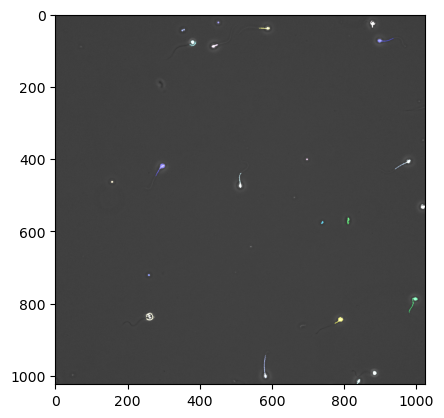

In [10]:
importlib.reload(visualizer)

original = utils.loadVideo(videofile,as_gray=False)
output = visualizer.createVisualization(original,final,visualization="segments")

plt.imsave("segmentation.jpg", output[7])

plt.imshow(output[7])
plt.show()

#visualizer.runVisualization(videofile, final, visualization="segments")